# Practicing K-Means:  Isotopic Composition Plutonium Batches




---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html).

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,rownames,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


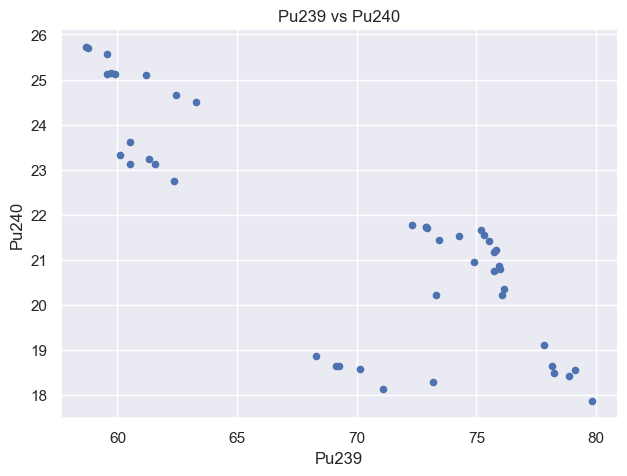

In [9]:
# A:

# select features with slicing
features = ['Pu239', 'Pu240']

# plot features
df[features].plot(kind = 'scatter', x = features[0], y = features[1], title = 'Pu239 vs Pu240')
plt.show()

By plotting the Pu239 and Pu240 we can see that there is a negative correlation between the two features, that as Pu239 increases, Pu240 decreases.

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [12]:
# A:
# Initiate KMeans model with 3 clusters and fit
model = KMeans(n_clusters = 3).fit(df[features])

C:\Users\Mazza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Assign clusters assignments (predictions) back to the original dataframe

In [13]:
# A: 
df['cluster'] = model.labels_

### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

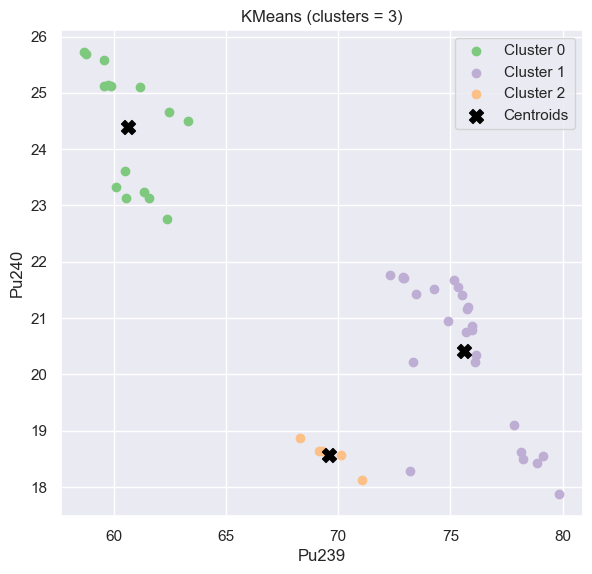

Silhouette Score:  0.6333309095852729


In [111]:
# A:
# Reference coordinates for centroids into dataframe
centroids = pd.DataFrame(model.cluster_centers_)

# Plot features
fig, ax = plt.subplots(figsize = (6, 6))

for i in range(len(centroids)):
    ax.scatter(df[features[0]][df['cluster'] == i], df[features[1]][df['cluster'] == i],
    c = [plt.get_cmap('Accent')(i)], label = 'Cluster %d' % i)

# Plot centroids
ax.scatter(centroids[0], centroids[1], s=100 , c = 'black', marker = 'X', label = 'Centroids')

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_title('KMeans (clusters = 3)')
ax.legend()
plt.show()

print('Silhouette Score: ', silhouette_score(df[features], df['cluster']))

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [102]:
# A:
# Standardise data and create DataFrame
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
features_scaled = pd.DataFrame(ss.fit_transform(df[features]))

In [95]:
# Initialise KMeans again with standardised data
model2 = KMeans(n_clusters = 3).fit(features_scaled)

C:\Users\Mazza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [106]:
# Assign clusters back to the dataframe
features_scaled['cluster'] = model2.labels_

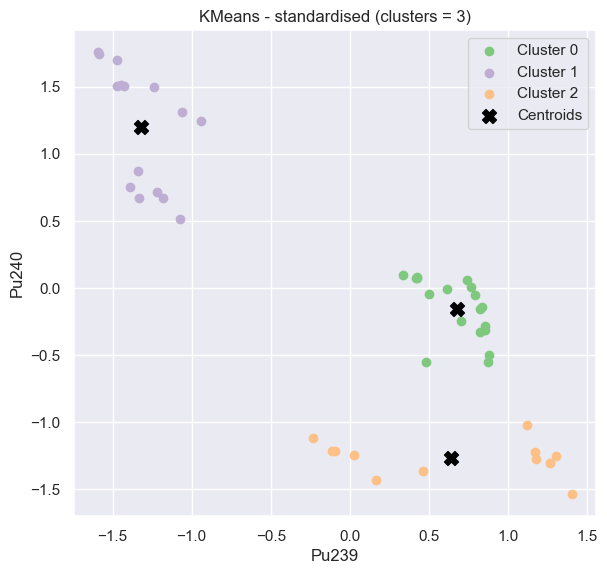

In [108]:
# Rerun plot
# Reference coordinates for centroids into dataframe
centroids2 = pd.DataFrame(model2.cluster_centers_)

# Plot features
fig2, ax2 = plt.subplots(figsize = (6, 6))

for i in range(len(centroids2)):
    ax2.scatter(features_scaled.iloc[:, 0][features_scaled['cluster'] == i], features_scaled.iloc[:, 1][features_scaled['cluster'] == i],
    c = [plt.get_cmap('Accent')(i)], label = 'Cluster %d' % i)

# Plot centroids
ax2.scatter(centroids2[0], centroids2[1], s=100 , c = 'black', marker = 'X', label = 'Centroids')

ax2.set_xlabel(features[0])
ax2.set_ylabel(features[1])
ax2.set_title('KMeans - standardised (clusters = 3)')
ax2.legend()
plt.show()

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [109]:
# A: 
print('Silhouette Score: ', silhouette_score(features_scaled, features_scaled['cluster']))

Silhouette Score:  0.7713988418610024
